# Wstęp

Framework tf-explain w odróżnieniu od innvestigate nie zwracał exception z uwagi na softmax. Jednak albo zwracał wyniki wyglądajace jak szum gaussowski, albo szybko explodowało zużycie ramu do poziomów ponad 80GB.  
Poniżej znajduje się jedno z wyjaśnień dla orginalnej sieci, która miała balanced accuracy na poziomie 0.97

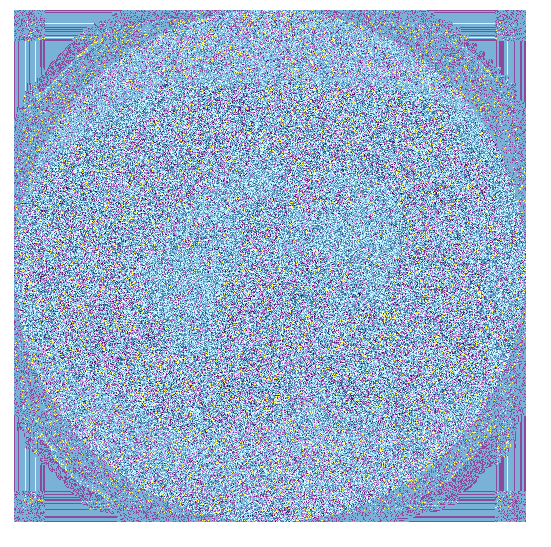

Idealne na kafelki w łazience, ale o sieci zbyt dużo to nie mówi.  
Dalej analizowaliśmy sieć stworzoną na potrzeby innvestigate z relu jako funkcję aktywacji, która osiągneła balanced accuracy 0.85.

# Wejście z nałożoym wyjściem które będziemy wyjaśniać

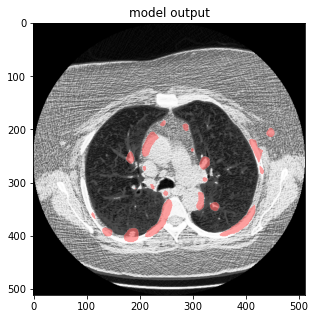

In [193]:
plt.imshow(np.squeeze(X),cmap='gray')
plt.imshow(colors[np.squeeze(Y_lbls)])
plt.title('model output')
plt.show()

# Gradient-weighted Class Activation Mapping

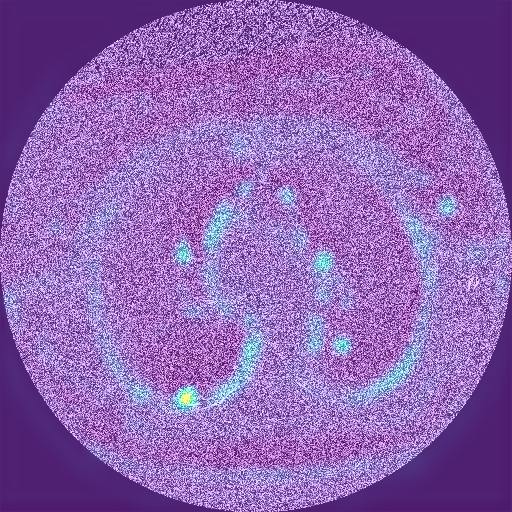

In [190]:
explainer = GradCAM()
display_expl(explainer.explain([img, None], model, class_index=0))

#### To wyjaśnienie wygląda bardzo sensownie. Sieć oznaczając jakieś fragmenty sugerowała się właśnie nimi. Nie są podświetlone żadne artefakty itp.

# Pozostałe gradienty niestety nie wyprodukowały sensownych wyników

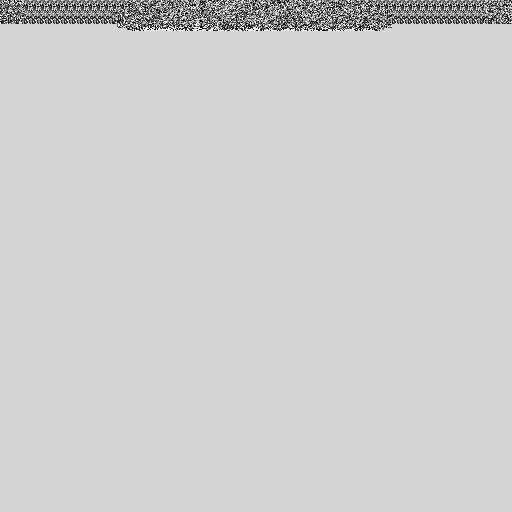

In [191]:
explainer = IntegratedGradients()
display_expl(explainer.explain([img, None], model, class_index=0))

<ipython-input-192-8ca9c72d124e>:2: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  display_expl(explainer.explain([img, None], model, class_index=0))


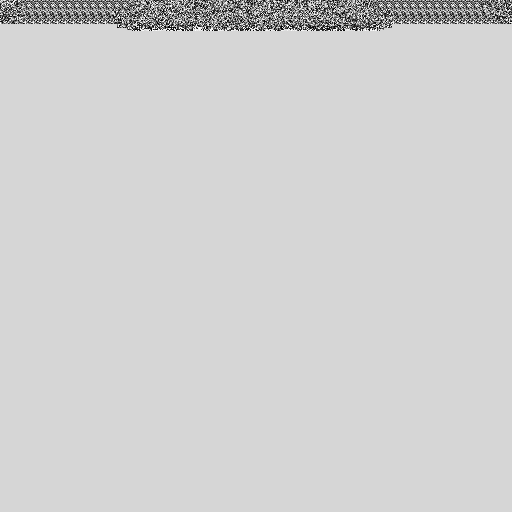

In [192]:
explainer = VanillaGradients()
display_expl(explainer.explain([img, None], model, class_index=0))

# Wizualizacja warstw aktywacyjnych

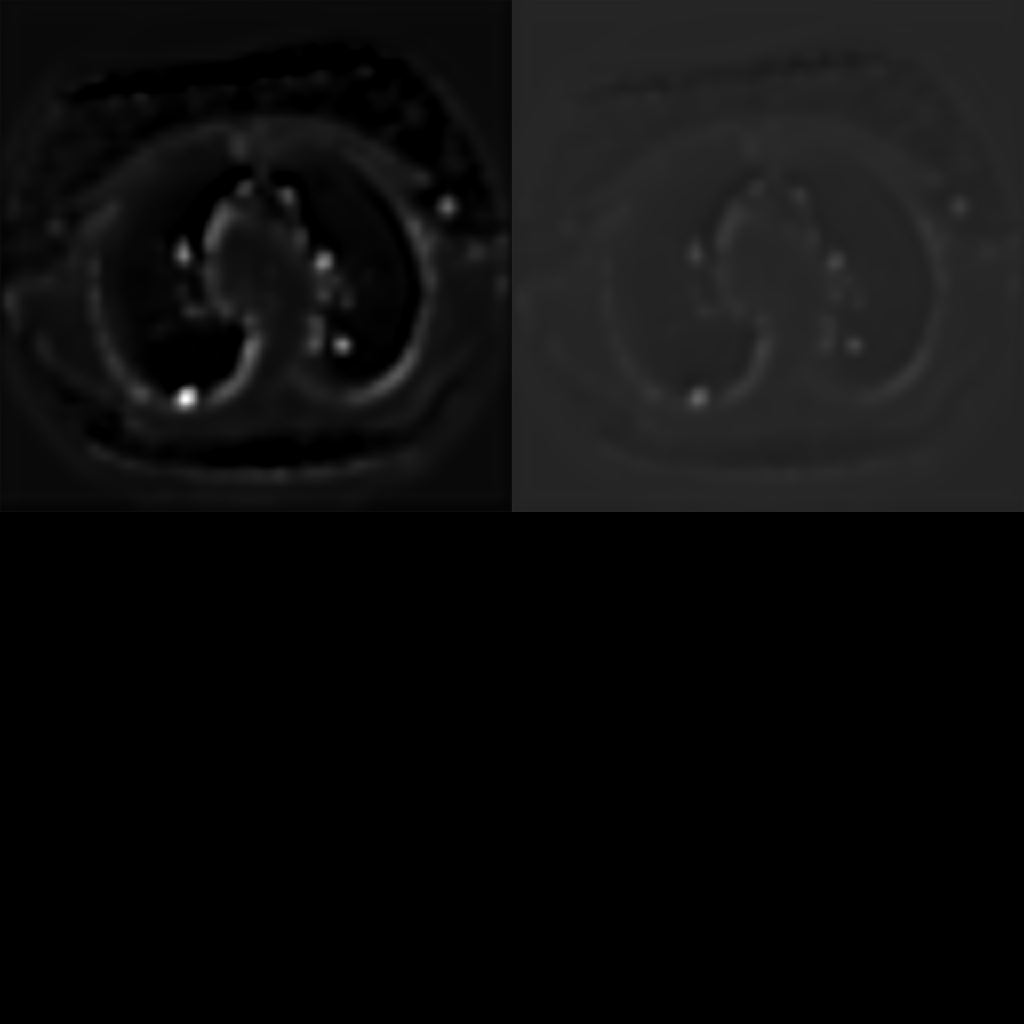

In [200]:
explainer = ExtractActivations()
display_expl(explainer.explain([img, None], model, ['conv2d_8']))

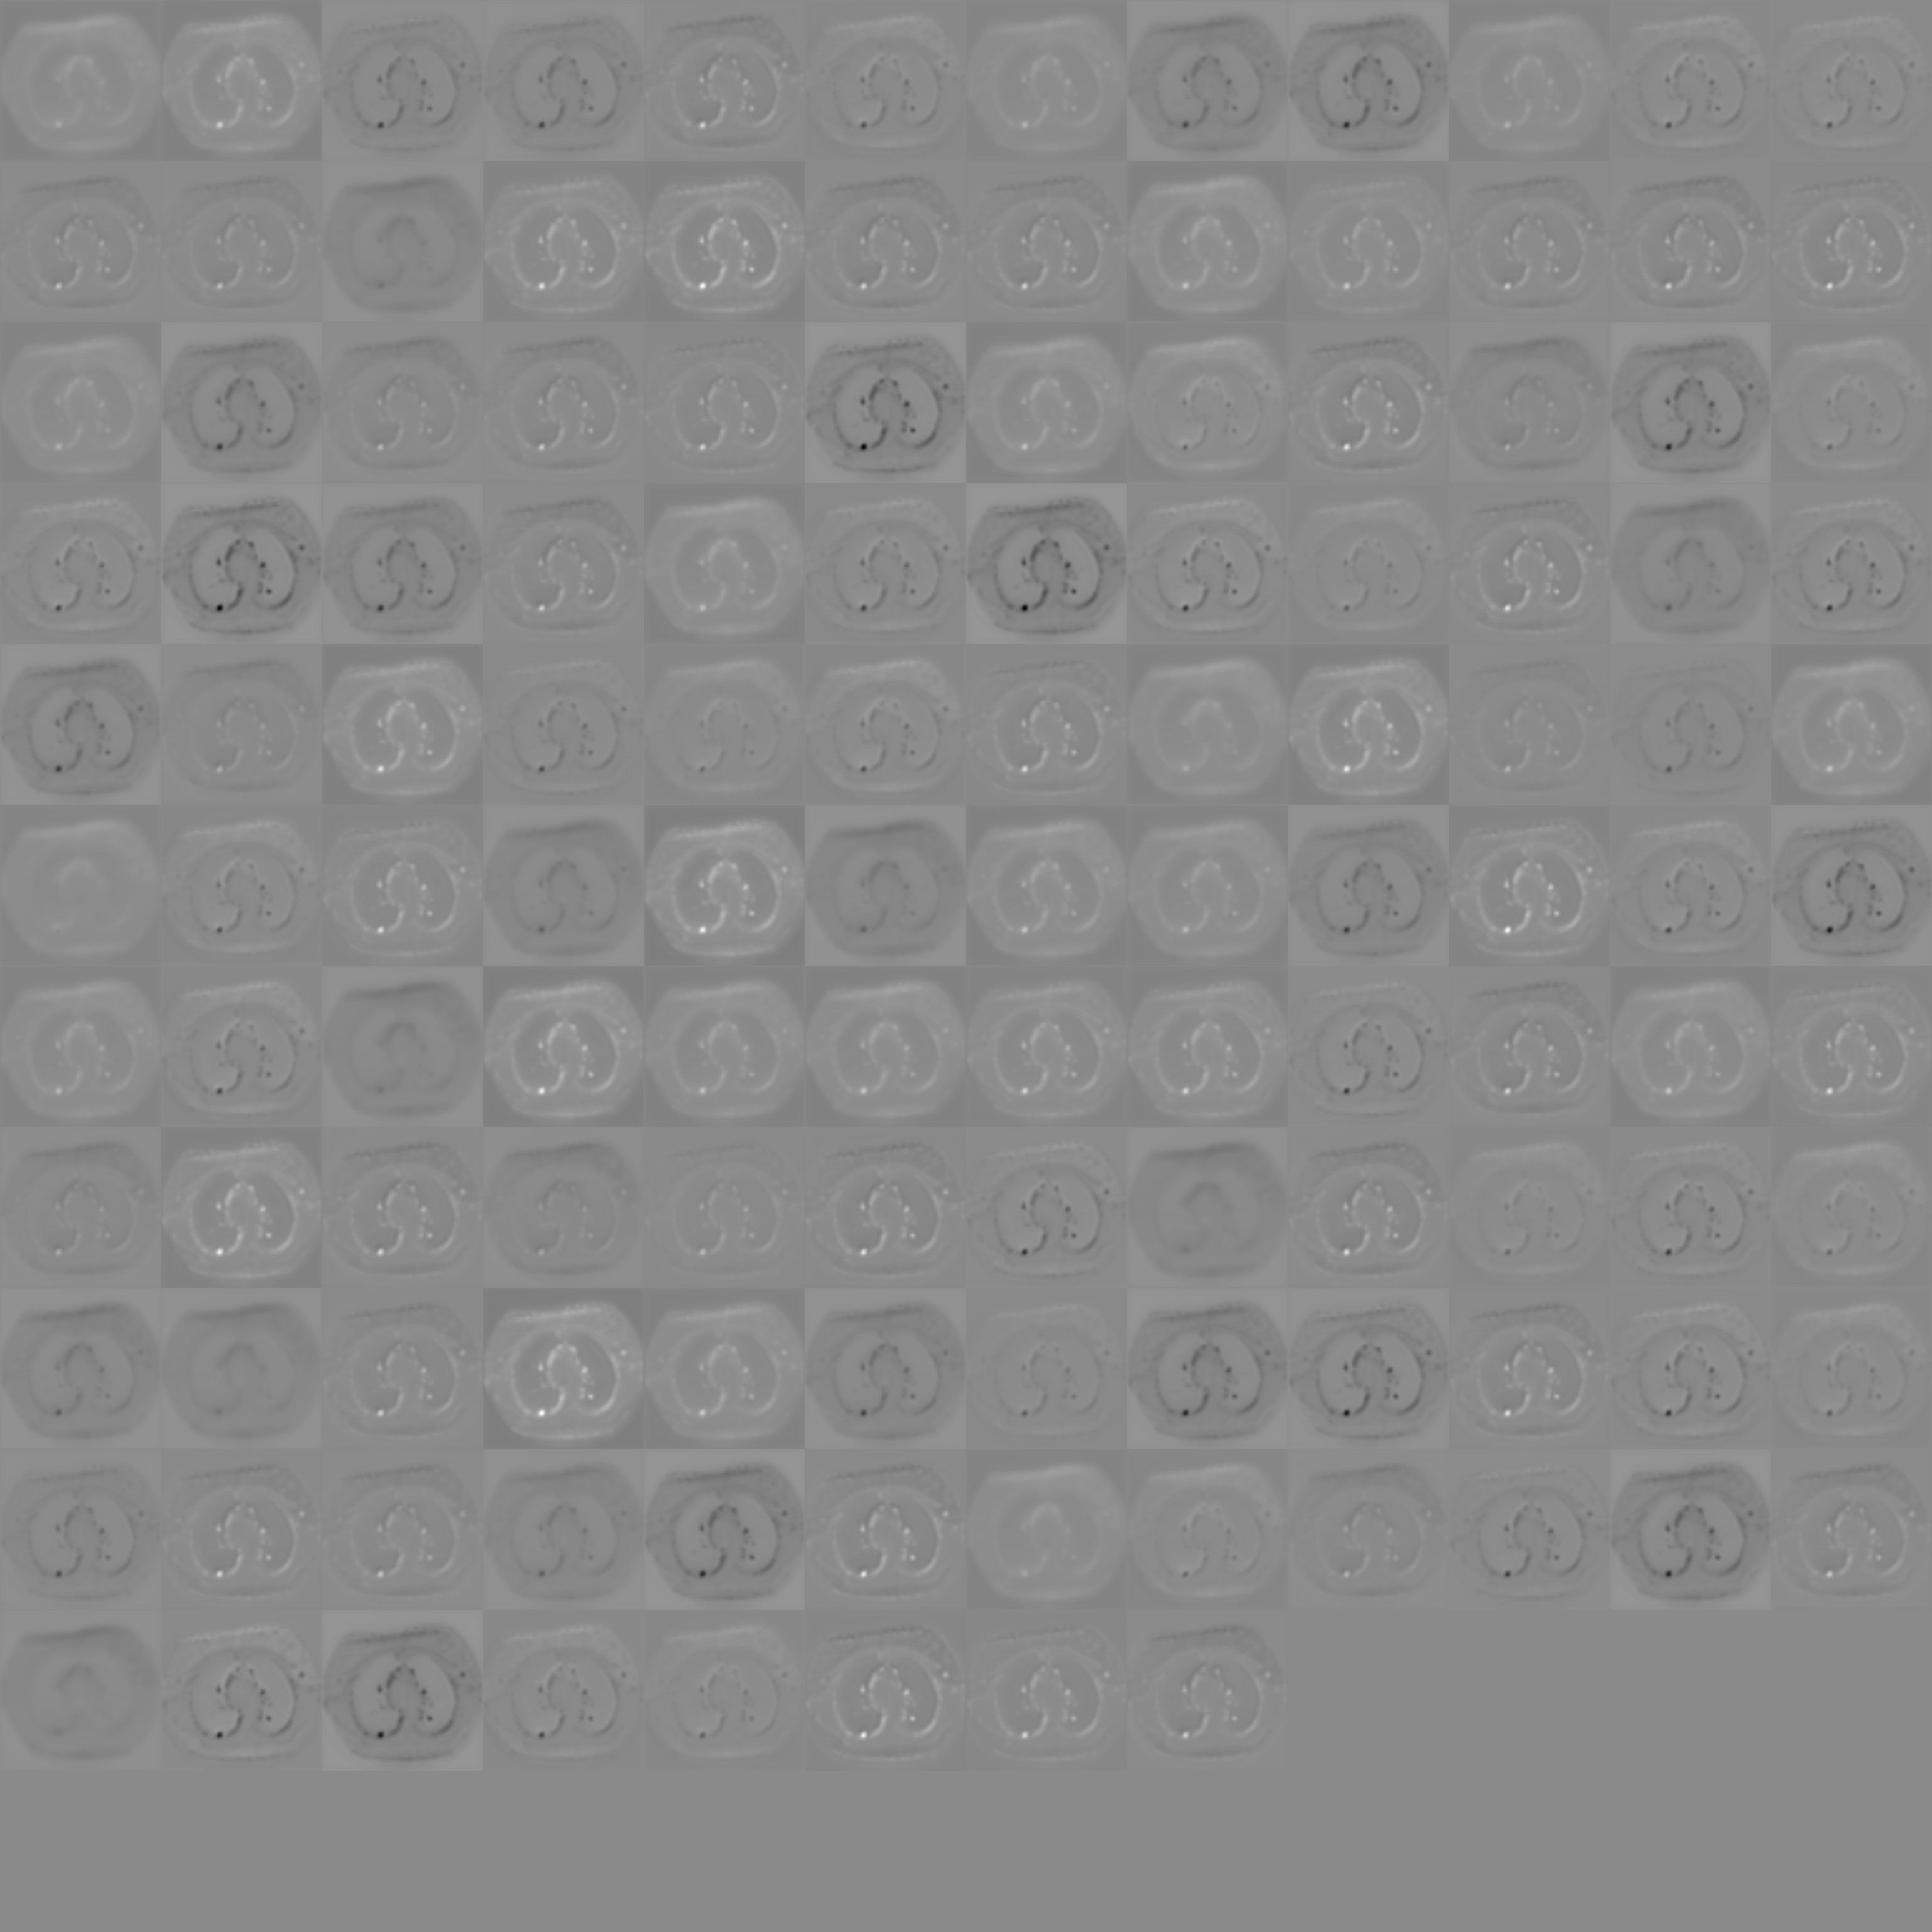

In [201]:
explainer = ExtractActivations()
display_expl(explainer.explain([img, None], model, ['conv2d_6']))

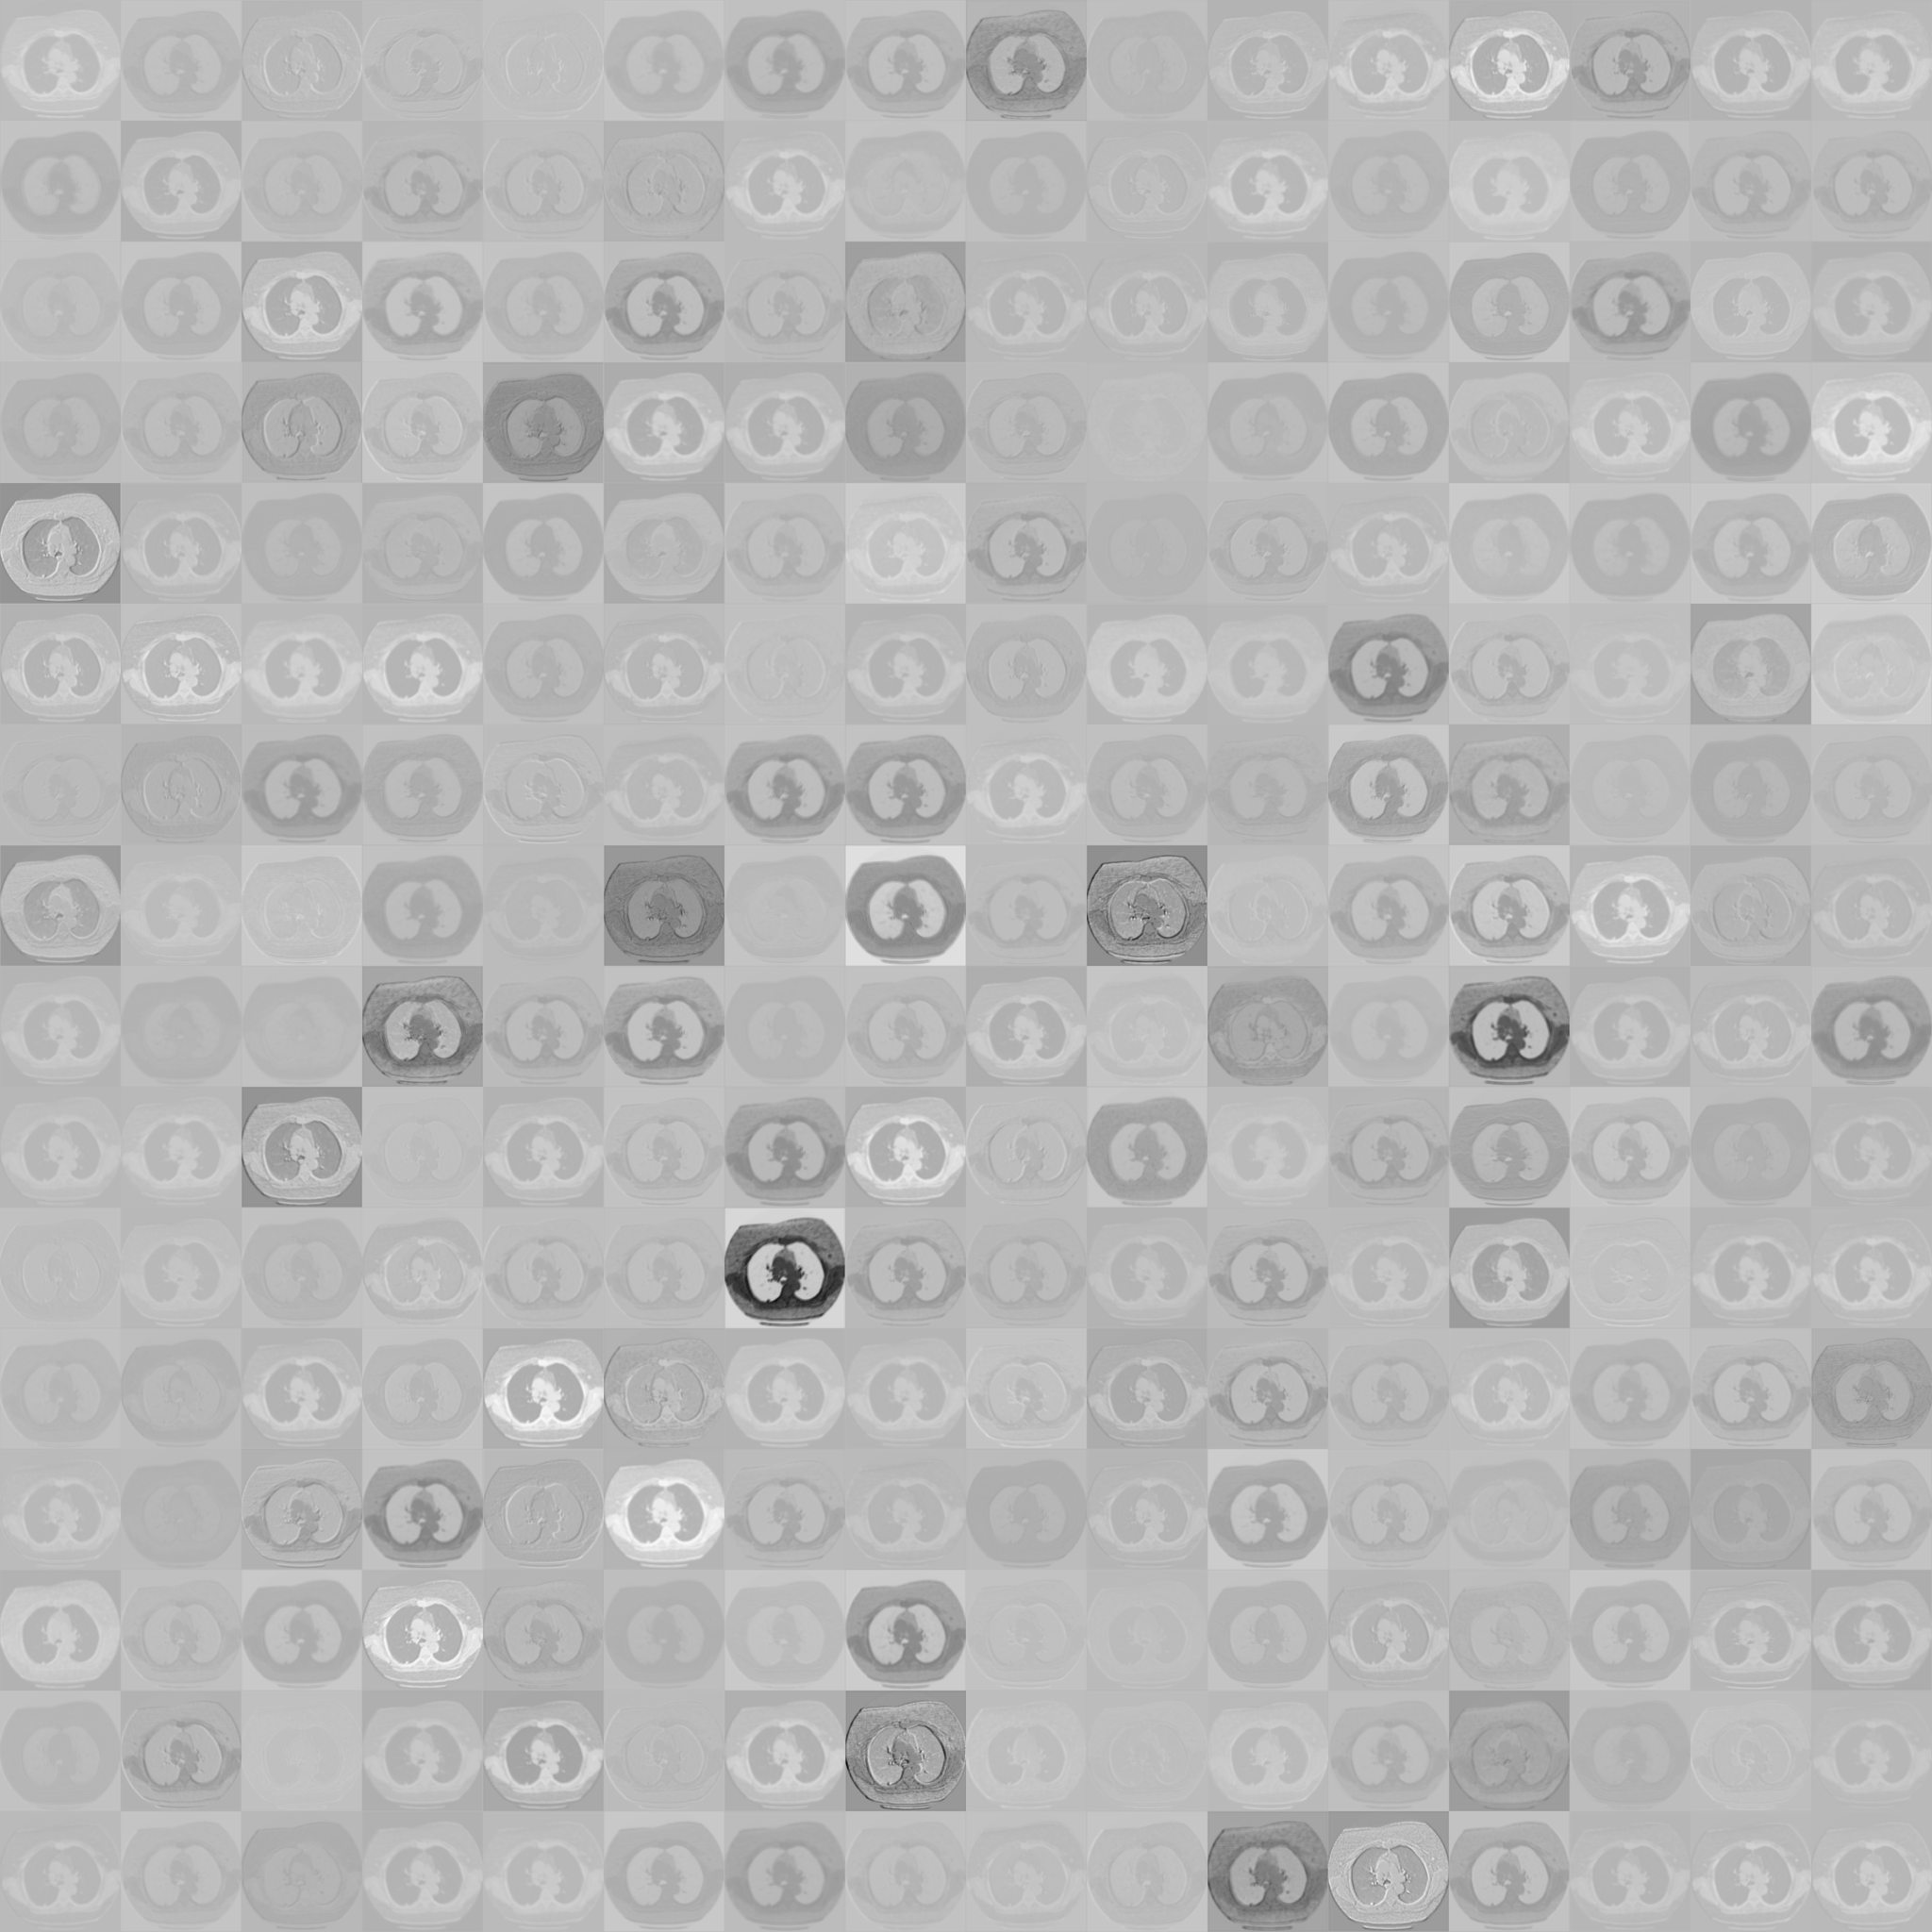

In [208]:
explainer = ExtractActivations()
display_expl(explainer.explain([img, None], model, ['conv2d_2']))

Taka wizualizacja nie jest prosta w analizie, ale wyobrażam sobie, że może być przydatna.

# OcclusionSensitivity
W doukumentacji ta metody wygląda obiecująco, ale niestety nie udało nam się jej uruchomić bez exception.